## Building a multilayer perceptron for regression in theano

In [62]:
import theano
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import sklearn
from sklearn import datasets
from sklearn import model_selection
cali_housing = sklearn.datasets.california_housing.fetch_california_housing()

X = cali_housing.data
y = cali_housing.target
Xy = np.vstack((X.T,y)).T

features_and_target = cali_housing.feature_names + ["target"]
features_to_retrieve = cali_housing.feature_names
target_feature = ["target"]
Xy_df = pd.DataFrame(Xy, columns=features_and_target)

In [64]:
cali_housing.data.shape

(20640, 8)

In [65]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
            'AveOccup', 'Latitude', 'Longitude']

target = ['target']

In [66]:
X_train = np.array(Xy_df[features].as_matrix(),dtype="float32")
y_train = np.array(Xy_df[target].as_matrix(),dtype="float32")
X_train = sklearn.preprocessing.minmax_scale(X_train)

X_train, X_test, y_train, y_test =sklearn.model_selection.train_test_split(X_train, y_train)

In [67]:
X_train.shape

(15480, 8)

In [68]:
X_test.shape

(5160, 8)

## Testing MLP regression with different optimizers

In [74]:
#Dropout
import matplotlib
from matplotlib import pyplot as plt
import mlp_regression
import sys

n_epochs = 150
batch_size = 200
results = {}

#### Train with dropout

In [70]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model_SGD = mlp_regression.MLPRegression(dims,
                                     activations=activations, 
                                     learning_rate=0.01, 
                                     seed=1234,
                                     max_iter=200,
                                     batch_size=200,
                                     dropout_prob = 0.005,
                                     loss='mean_squared_error',
                                     optimizer='SGD',
                                     random_state=1234)
model_SGD.fit(X_train, y_train,
          X_val=X_test, y_val=y_test, n_epochs=n_epochs)

	Using SGD optimizer


In [90]:
results['dropout005_SGD_train'] = model_SGD.loss_curve_
results['dropout005_SGD_test'] = model_SGD.loss_curve_validation_

#### Adding momentum

In [78]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model_SGDmomentum = mlp_regression.MLPRegression(dims,
                                     activations=activations, 
                                     learning_rate=0.01, 
                                     seed=1234,
                                     max_iter=200,
                                     batch_size=200,
                                     dropout_prob = 0.005,
                                     loss='mean_squared_error',
                                     optimizer='SGD_momentum',
                                     momentum=0.9,
                                     random_state=1234)

model_SGDmomentum.fit(X_train, y_train,
          X_val=X_test, y_val=y_test, n_epochs=n_epochs)

	Using SGD_momentum optimizer


In [91]:
results['dropout005_SGDmomentum_train'] = model_SGDmomentum.loss_curve_
results['dropout005_SGDDmomentum_test'] = model_SGDmomentum.loss_curve_validation_

#### Trying RMSprop

In [113]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model_RMSprop = mlp_regression.MLPRegression(dims,
                                     activations=activations, 
                                     learning_rate=0.01, 
                                     seed=1234,
                                     max_iter=200,
                                     batch_size=200,
                                     dropout_prob = 0.005,
                                     loss='mean_squared_error',
                                     optimizer='RMSprop',
                                     momentum=0.9,
                                     random_state=1234)

model_RMSprop.fit(X_train, y_train,
          X_val=X_test, y_val=y_test, n_epochs=n_epochs)

	Using SGD_momentum optimizer


In [114]:
results['dropout005_RMSprop_train'] = model_RMSprop.loss_curve_
results['dropout005_RMSprop_test'] = model_RMSprop.loss_curve_validation_

#### Trying SGD_nesterov

In [112]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model_SGDnesterov = mlp_regression.MLPRegression(dims,
                                     activations=activations, 
                                     learning_rate=0.01, 
                                     seed=1234,
                                     max_iter=200,
                                     batch_size=200,
                                     dropout_prob = 0.005,
                                     loss='mean_squared_error',
                                     optimizer='SGD_nesterov',
                                     momentum=0.9,
                                     random_state=1234)

model_SGDnesterov.fit(X_train, y_train,
          X_val=X_test, y_val=y_test, n_epochs=n_epochs)

	Using SGD_nesterov optimizer


In [115]:
results['dropout005_SGDnesterov_train'] = model_SGDnesterov.loss_curve_
results['dropout005_SGDnesterov_test'] = model_SGDnesterov.loss_curve_validation_

#### Compare SGD , SGD with momentum, RMSprop

In [116]:
# SGD vs SGD_momentum
results_df = pd.DataFrame(results)
cols = ['dropout005_SGD_train','dropout005_SGDmomentum_train',
        'dropout005_RMSprop_train','dropout005_SGDnesterov_train']

In [117]:
results_df[cols][0:5]

,dropout005_SGD_train,dropout005_SGDmomentum_train,dropout005_RMSprop_train,dropout005_SGDnesterov_train
0,2.483875,1.702228,2.039301,1.636785
1,1.302173,1.305065,0.802226,1.098019
2,1.278910,0.912930,0.671930,0.582193
3,1.253276,0.541816,0.646374,0.536660
4,1.220407,0.519731,0.611670,0.515785


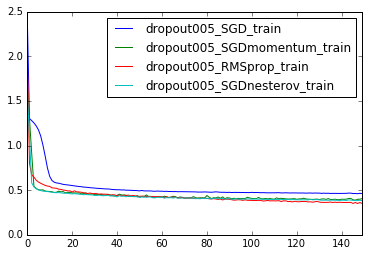

In [118]:
cols = ['dropout005_SGD_train','dropout005_SGDmomentum_train',
        'dropout005_RMSprop_train','dropout005_SGDnesterov_train']

results_df[cols].plot()

## Relevant hyperparameters:

- Should we use dropout or not?


#### Try another dropout prob.

This one does not seem very reasonable

	Using SGD_momentum optimizer


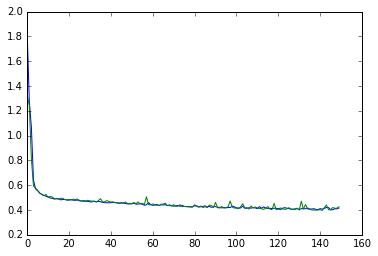

In [100]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model = mlp_regression.MLPRegression(dims,
                                     activations=activations, 
                                     learning_rate=0.005,
                                     dropout_prob=0.005,
                                     loss='mean_squared_error',
                                     batch_size=200,
                                     seed=1234)

model.fit(X_train, y_train, X_val=X_test,
          y_val=y_test, n_epochs = n_epochs)

plt.plot(model.loss_curve_)
plt.plot(model.loss_curve_validation_)

#### No dropout

In [ ]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model_nodropout = mlp_regression.MLPRegression(dims,
                                     activations=activations,
                                     learning_rate=0.005,
                                     dropout_prob=-1,
                                     loss='mean_squared_error')

In [ ]:
model_nodropout.fit(X_train, y_train, X_val=X_test,
                    y_val=y_test, n_epochs = n_epochs)

In [ ]:
plt.plot(model_nodropout.loss_curve_)
plt.plot(model_nodropout.loss_curve_validation_)

In [ ]:
plt.plot(model_nodropout.loss_curve_)
plt.plot(model_nodropout.loss_curve_validation_)

plt.plot(model.loss_curve_)
plt.plot(model.loss_curve_validation_)

## Comparison vs sklearn MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor 

In [ ]:
mlp = MLPRegressor()

In [ ]:
mlp.fit(X_train,y_train)

In [ ]:
#mlp.loss_curve_

### MLP using partial fit

- The code allows to build a custom loop over the data and train in minibatches.

- In fact this is what the fit function does

In [ ]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model = mlp_regression.MLPRegression(dims,
                                     activations=activations, 
                                     learning_rate=0.005,
                                     dropout_prob=0.05)

n_samples = X_train.shape[0]
n_batches = n_samples // batch_size 

cost_evolution = []
cost_test_evolution = []
cost_train_evolution = []

for i in range(n_epochs):
    cost_minibatch = 0
    n_batches = 0
    for ind in range(0, n_samples, batch_size):
        n_batches += 1
        cost_minibatch += model.partial_fit(X_train[ind:ind+batch_size], 
                                            y_train[ind:ind+batch_size])
    
    cost_test_evolution.append(model.compute_cost_(X_test, y_test))
    cost_train_evolution.append(model.compute_cost_(X_train, y_train))

    cost_evolution.append(cost_minibatch/n_batches )
    #print (cost_minibatch/n_batches)

In [ ]:
plt.plot(cost_evolution,"--")
plt.plot(cost_test_evolution,"-")

In [ ]:
srng = theano.tensor.shared_randomstreams.RandomStreams()

In [ ]:
p=0.3
mask = srng.binomial(n=1, p=1-p, size=list([5]), dtype= theano.config.floatX)

In [ ]:
srng.binomial(n=1, p=0.1, size=[20]).eval()

In [ ]:
srng.binomial(n=1, p=0.2, size=[3,100]).eval().sum(axis=1)

In [ ]:
help(srng.binomial)

#### Train without dropot

In [ ]:
n_features = len(features)
dims = [n_features, 400, 400, 1]
activations = ["relu", "relu", "identity"]

model = mlp_regression.MLPRegression(dims, 
                                     activations=activations , 
                                     learning_rate=0.005,
                                     dropout_prob=-1)

n_samples = X_train.shape[0]
batch_size = 200
n_batches = n_samples // batch_size 

import sys
cost_evolution_nodropout = []
cost_test_evolution_nodropout = []

for i in range(n_epochs):
    cost_minibatch =0
    n_batches = 0
    for ind in range(0, n_samples, batch_size):
        n_batches +=1
        cost_minibatch += model.partial_fit(X_train[ind:ind+batch_size], 
                                            y_train[ind:ind+batch_size])
    
    cost_test_evolution_nodropout.append(model.compute_cost_(X_test, y_test))
    cost_evolution_nodropout.append(cost_minibatch/n_batches )
    #print (cost_minibatch/n_batches)

In [ ]:
plt.plot(cost_evolution_nodropout[10:],"-", color='black')
plt.plot(cost_test_evolution_nodropout[10:],"--",color='black')

plt.plot(cost_evolution[10:],"-", color='red')
plt.plot(cost_test_evolution[10:],"--", color='red')

In [ ]:
sklearn.loss

In [ ]:
import mlp_regression

In [ ]:
n_features = len(features)

In [ ]:
dims = [n_features, 200, 100, 1]
activations = ["relu", "relu", "identity"]

In [ ]:
model = mlp_regression.MLPRegression(dims, activations, learning_rate=0.0001)

In [ ]:
model.predict(Xy_df[features][0:5])

### Computing MSE

- Check that MSE is computed correctly

In [ ]:
from sklearn import metrics
sklearn.metrics.mean_squared_error

In [ ]:
yhat = model.predict(Xy_df[features][0:5])
y = Xy_df[target][0:5]
sklearn.metrics.mean_squared_error(yhat.flatten(), y)

In [ ]:
model.compute_cost(Xy_df[features][0:5], Xy_df[target][0:5])

In [ ]:
model.compute_sym_cost(Xy_df[features][0:5], Xy_df[target][0:5])

### Learning: testing fitting minibatch

In [ ]:
model.W[2].shape.eval()

In [ ]:
model = mlp_regression.MLPRegression(dims, activations, learning_rate=0.001)

In [ ]:
model.predict(X_train[0:10])

In [ ]:
y_train[0:10].ndim

In [ ]:
#Fits the current minibatch and returns the cost for the current minibatch
model.tfunc_fit_mini_batch(X_train[0:10], y_train[0:10])

In [ ]:
model.predict(X_train[0:3])

In [ ]:
model.tfunc_fit_mini_batch(X_train[0:10], y_train[0:10])

In [ ]:
model.predict(X_train[0:10])

In [ ]:
model.learning_rate

### 2 Layer MLP 

In [ ]:
import theano
from theano import tensor as T

def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def relu(X):
    return T.maximum(X, 0.)


def updates_sgd(cost, params):
    """
    Method used to define a list of symbolic updates for theano
    """
    grads = theano.tensor.grad(cost=cost, wrt=params)
    updates = []
    for param,grad in zip(params, grads):
        updates.append([param, param - grad * 0.01 ])

    return updates

In [ ]:
n_features = X_train.shape[1]
n_hid = 200
n_out = 1

sha_W1 = theano.shared(floatX(np.random.normal(np.zeros((n_features,n_hid)), scale=0.1)/np.sqrt(n_features)))
sha_b1 = theano.shared(floatX(np.zeros(n_hid)))

sha_W2 = theano.shared(floatX(np.random.normal(np.zeros((n_hid,n_out)), scale=0.1)/np.sqrt(n_out)))
sha_b2 = theano.shared(floatX(np.zeros(1)))

params = [sha_W1, sha_b1, sha_W2, sha_b2]

sym_Xbatch = T.matrix("sym_Xbatch")
sym_Ybatch = T.matrix("sym_Ybatch")

sym_out = T.dot(relu(T.dot(sym_Xbatch, sha_W1) + sha_b1), sha_W2) + sha_b2
sym_cost = T.mean((sym_out - sym_Ybatch)**2)
sym_updates = updates_sgd(sym_cost, params)

tfunc_fitbatch = theano.function(inputs=[sym_Xbatch, sym_Ybatch], 
                                 outputs=sym_cost,
                                 updates=sym_updates,
                                 allow_input_downcast = True)


tfunc_output = theano.function(inputs=[sym_Xbatch], 
                                outputs=[sym_out,], 
                                 allow_input_downcast = True)


In [ ]:
#sym_out.eval({"sym_Xbatch":X_train[0:100]})

In [ ]:
tfunc_output(X_train[0:2])

In [ ]:
X_train = sklearn.preprocessing.minmax_scale(X_train)

In [ ]:
import sys
cost_evo = []
for i in range(1000):
    cost_evo.append(tfunc_fitbatch(X_train[0:100], y_train[0:100]))